# Assessed Problems 4

Each two week block has an associated assessed problems sheet. There are always two questions with equal weighting.


- **All questions are marked in class by the demonstrators and can be completed in the blank assessed problems submission notebook.** You can have multiple attempts and demonstrators will give you feedback on your approach. You can often solve the problem in multiple ways but you will need to reach a required standard to receive a pass.

**It is expected that you attend all timetabled coding lab sessions assigned to you. This will assist in allowing enough time to speak to a demonstrator to get your attempt for question 1 graded.**

You should also submit working code for each problem via the canvas upload link provided. This will be used as a record of your work, and for plaigiarism and validation checks for question 2.

In [5]:
import numpy as np

*** 

## Q1) Bisection method

<!-- -see *newman 6.15* -->

The bisection method is a very robust method for finding roots of a function (i.e. find x where f(x)=0). It is useful in the scenario where you know two values of the function, f(a) and f(b) where one f(a)>0 and f(b)<0 or vice versa. 

<div>
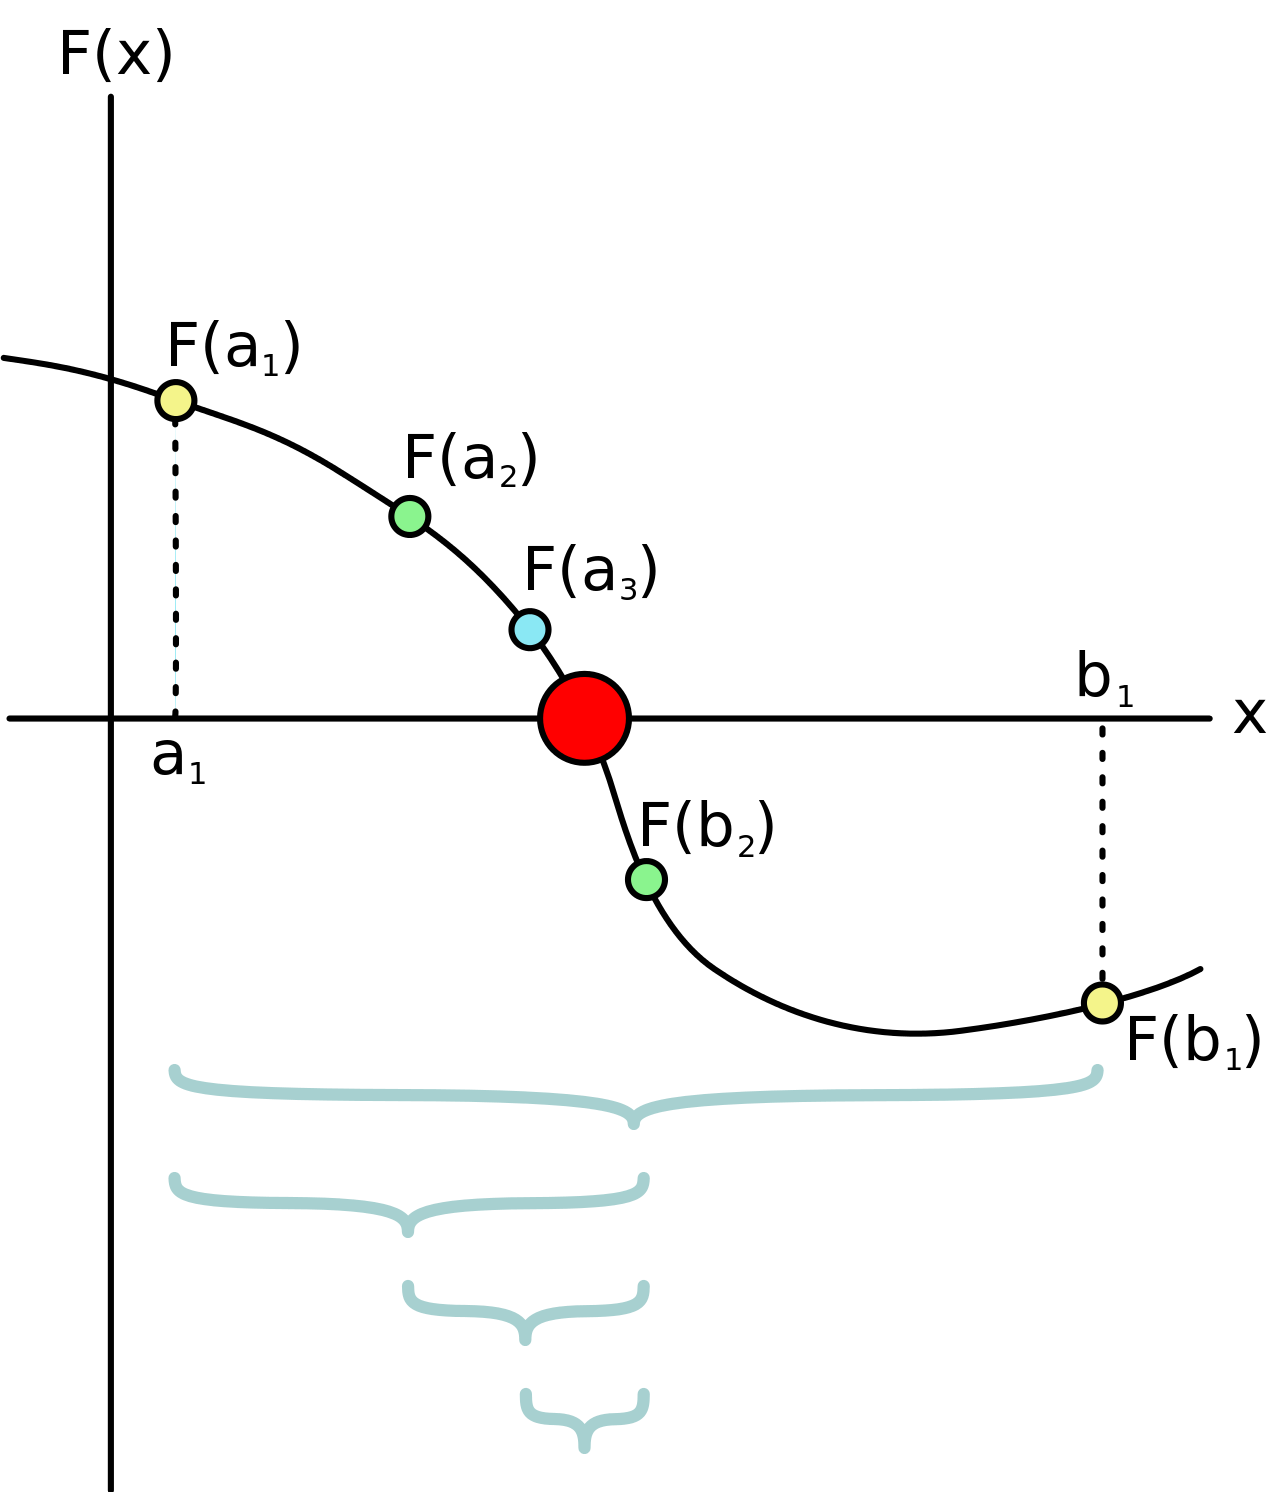
</div>

The way it works is that we follow these steps iteratively:

1) Calculate c which is halfway between a and b
2) Calculate f(c)
3) If f(c) $\approx$ 0 then stop - f(x)=0 is given approximately by x=c
4) If f(c)>0 and f(a)>0, then replace a by c. If f(c)<0 and f(a)>0 then replace b by c.

Following the image above, you can see this will then continuously approach f(x)=0 and x=c.


a) Implement the bisection method as a function. You should be able to specify the following parameters: **[1 Mark]**
- `f` - objective function 
- `x1`, `x2` - the search window
- `max_iterations=1000` - an optional maximum number of iterations with a default value
- `atol=1E-10` - an optional absolute tolerance with a default value

b) Using the bisection method, find the roots of the following function. **[1 Mark]**

$$f(x) = (x+0.6) (x-1.73) (x-\pi)$$

![Polynomial](resources/poly3.png)



a)

In [6]:
C = 0

# Input
x1 = float(input("What is the lower value: "))
x2 = float(input("What is the upper value: "))

# Function to find the root
def f(x):
    return (x + 0.6)*(x - 1.73)*(x - np.pi)

# Bisection method
def bisection_method(f, x1, x2, atol=1e-10, max_iterations=1000):
    for i in range(max_iterations):
        C = (x1 + x2)/2
        
        if abs(f(C)) < atol:
            return C, f(C), i+1  # midpoint, f(midpoint), number of iterations
        
        if f(C) * f(x1) < 0:
            x2 = C
        else:
            x1 = C
            
    # if max iterations reached
    return C, f(C), max_iterations

# Run the method
root, f_at_root, iterations = bisection_method(f, x1, x2)

# Output
print(f"The x value is: {root}")
print(f"The y value is: {f_at_root}")
print(f"The number of iterations: {iterations}")

What is the lower value:  3
What is the upper value:  4


The x value is: 3.1415926535846666
The y value is: -2.707649424037883e-11
The number of iterations: 33


b)

In [7]:
C = 0  # or any value you want to test

def f1(C):
    return C + 0.6

def f2(C):
    return C - 1.73

def f3(C):
    return C - np.pi

# Evaluate the functions at C
y = f1(C)
z = f2(C)
w = f3(C)

print("f1(C) =", y)
print("f2(C) =", z)
print("f3(C) =", w)

f1(C) = 0.6
f2(C) = -1.73
f3(C) = -3.141592653589793


***

## Q2) Normalising a list of numbers

Normalising a set of numbers in this context means to apply a linear transformation such that all the numbers in a list 
 lie between 0 and 1, with ordered maintained.

X = `[10, 1, 19, -7, 14, -3]`

a) Try this task first using the built in functions `min` and `max`. **[1 Mark]**

b) Now try again but write your own code to find the minimum and maximum values. **[1 Mark]**



a)

In [4]:
X = [10, 1, 19, -7, 14, -3]
xmax = max(X) 
xmin = min(X) #function that already exists in python.
print(max(X))
print(min(X))
import numpy as np

def NormalizeData(X):  # turns all the values in the list into a value between 0 and 1.
    return (X - np.min(X)) / (np.max(X) - np.min(X))
NormalizeData(X)


19
-7


array([0.65384615, 0.30769231, 1.        , 0.        , 0.80769231,
       0.15384615])

b)

In [14]:
X = [10, 1, 19, -7, 14, -3]

min_val=X[0]
max_val=X[0]

for x in X:
    if x<min_val: # will go through all the values in the list X and if the value is greater than the one before it is the new maximum and if it is smaller than the one before it's the new minimum.
        min_val=x
    elif x>max_val:
        max_val=x
        
print(f"the minimum value is : {min_val}")
print(f"the maximum value is : {max_val}")


    

the minimum value is : -7
the maximum value is : 19


*** 

## Q3) The Madelung constant

<!-- newman ex2.9 -->


In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid. It depends on the charges on the other atoms nearby and their locations. Consider for instance solid sodium chloride (table salt). The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the chlorine ones a single negative charge $-e$, where $e$ is the charge on the electron. If we label each position on the lattice by three integer coordinates $(i, j, k)$, then the sodium atoms fall at positions where $i+j+k$ is even, and the chlorine atoms at positions where $i+j+k$ is odd.

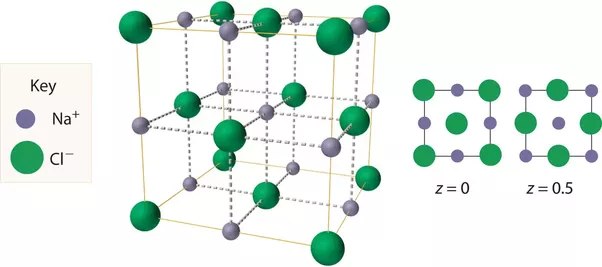

Consider a sodium atom at the origin, $i=j=k=0$, and let us calculate the Madelung constant. If the spacing of atoms on the lattice is $a$, then the distance from the origin to the atom at position $(i, j, k)$ is

$$
\sqrt{(i a)^2+(j a)^2+(k a)^2}=a \sqrt{i^2+j^2+k^2},
$$

and the potential at the origin created by such an atom is

$$
V(i, j, k)= \pm \frac{e}{4 \pi \epsilon_0 a \sqrt{i^2+j^2+k^2}},
$$

with $\epsilon_0$ being the permittivity of the vacuum and the sign of the expression depending on whether $i+j+k$ is even or odd. The total potential felt by the sodium atom is then the sum of this quantity over all other atoms. Let us assume a cubic box around the sodium at the origin, with $L$ atoms in all directions. Then

$$
V_{\text {total }}=\sum_{\substack{i, j \in=-L \\ \text { not } i=j=k=0}}^L V(i, j, k)=\frac{e}{4 \pi \varepsilon_0 a} M,
$$

where $M$ is the Madelung constant, at least approximately-technically the Madelung constant is the value of $M$ when $L \rightarrow \infty$, but one can get a good approximation just by using a large value of $L$.

a) Write a program to calculate and print the Madelung constant for sodium chloride. Use as large a value of $L$ as you can, while still having your program run in reasonable time-say in a minute or less. **[1 Mark]**

In [8]:

# Choose N (number of atoms in each direction)
N = 10  # You can increase this, but large N will be slower

# Initialize the Madelung constant
alpha = 0.0

# Loop over all lattice points
for i in range(-N, N+1):
    for j in range(-N, N+1):
        for k in range(-N, N+1):
            if i == 0 and j == 0 and k == 0:
                continue  # skip the origin
            distance = np.sqrt(i**2 + j**2 + k**2)
            alpha += (-1)**(i+j+k) / distance

print(f"Approximate Madelung constant (N={N}): {alpha:.6f}")


Approximate Madelung constant (N=10): -1.692579
